In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from photospline import glam_fit, ndsparse, bspline
import photospline as psp
from scipy import interpolate

In [2]:
df_mu = pd.read_csv('AtProduction_neutrinos_mu.dat', delimiter='\s+',header=0)
df_tau = pd.read_csv('AtProduction_neutrinos_tau.dat', delimiter='\s+',header=0)
df_e = pd.read_csv('AtProduction_neutrinos_e.dat', delimiter='\s+',header=0)

In [3]:
df_Wb_mu= df_mu[['mDM','Log[10,x]','b','W']]
df_Wb_tau= df_tau[['mDM','Log[10,x]','b','W']]
df_Wb_e= df_e[['mDM','Log[10,x]','b','W']]

In [4]:
#mu
#100GeV
df_Wb_mu_100GeV=df_Wb_mu[df_Wb_mu['mDM']==100]
df_Wb_mu_100GeV['E']= 10**(df_Wb_mu_100GeV['Log[10,x]'])*100
df_Wb_mu_100GeV['W']/= 100
df_Wb_mu_100GeV['b']/= 100
#1TeV
df_Wb_mu_1TeV=df_Wb_mu[df_Wb_mu['mDM']==1000]
df_Wb_mu_1TeV['E']= 10**(df_Wb_mu_1TeV['Log[10,x]'])*1000
df_Wb_mu_1TeV['W']/= 1000
df_Wb_mu_1TeV['b']/= 1000
#10TeV
df_Wb_mu_10TeV=df_Wb_mu[df_Wb_mu['mDM']==10000]
df_Wb_mu_10TeV['E']= 10**(df_Wb_mu_10TeV['Log[10,x]'])*10000
df_Wb_mu_10TeV['W']/= 10000
df_Wb_mu_10TeV['b']/= 10000

/tmp/ipykernel_30606/797019460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wb_mu_100GeV['E']= 10**(df_Wb_mu_100GeV['Log[10,x]'])*100
/tmp/ipykernel_30606/797019460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wb_mu_100GeV['W']/= 100
/tmp/ipykernel_30606/797019460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [5]:
#check normalisation 
print(np.sum((np.asarray(df_Wb_mu_100GeV['W'])[:-1]) * (np.diff(df_Wb_mu_100GeV['E']))))
print(np.sum((np.asarray(df_Wb_mu_1TeV['W'])[:-1]) * (np.diff(df_Wb_mu_1TeV['E']))))
print(np.sum((np.asarray(df_Wb_mu_10TeV['W'])[:-1]) * (np.diff(df_Wb_mu_10TeV['E']))))
df_Wb_mu_100GeV['W']

0.6563561130171094
0.6642791531664218
0.6580615644171254


2506    0.000000
2507    0.000000
2508    0.000000
2509    0.000000
2510    0.000000
          ...   
2680    0.002544
2681    0.002231
2682    0.001196
2683    0.000511
2684    0.000301
Name: W, Length: 179, dtype: float64

In [6]:
df_Wb_mu_100GeV['W'][2684]=0
f_100_W = interpolate.interp1d(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['W']*2,fill_value="extrapolate")

/tmp/ipykernel_30606/74687594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wb_mu_100GeV['W'][2684]=0


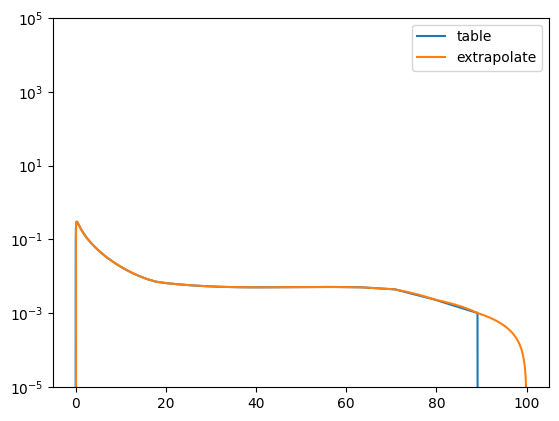

In [7]:
bins=np.linspace(0,100,1000)
plt.plot(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['W']*2,label='table')
plt.plot(bins,f_100_W(bins),label='extrapolate')
plt.yscale('log')
plt.ylim((1e-5,1e5))
plt.legend()

In [8]:
#tau
#100GeV
df_Wb_tau_100GeV=df_Wb_tau[df_Wb_tau['mDM']==100]
df_Wb_tau_100GeV['E']= 10**(df_Wb_tau_100GeV['Log[10,x]'])*100
df_Wb_tau_100GeV['W']/= 100
df_Wb_tau_100GeV['b']/= 100
#1TeV
df_Wb_tau_1TeV=df_Wb_tau[df_Wb_tau['mDM']==1000]
df_Wb_tau_1TeV['E']= 10**(df_Wb_tau_1TeV['Log[10,x]'])*1000
df_Wb_tau_1TeV['W']/= 1000
df_Wb_tau_1TeV['b']/= 1000
#10TeV
df_Wb_tau_10TeV=df_Wb_tau[df_Wb_tau['mDM']==10000]
df_Wb_tau_10TeV['E']= 10**(df_Wb_tau_10TeV['Log[10,x]'])*10000
df_Wb_tau_10TeV['W']/= 10000
df_Wb_tau_10TeV['b']/= 10000

#e
#100GeV
df_Wb_e_100GeV=df_Wb_e[df_Wb_e['mDM']==100]
df_Wb_e_100GeV['E']= 10**(df_Wb_e_100GeV['Log[10,x]'])*100
df_Wb_e_100GeV['W']/= 100
df_Wb_e_100GeV['b']/= 100
#1TeV
df_Wb_e_1TeV=df_Wb_mu[df_Wb_e['mDM']==1000]
df_Wb_e_1TeV['E']= 10**(df_Wb_e_1TeV['Log[10,x]'])*1000
df_Wb_e_1TeV['W']/= 1000
df_Wb_e_1TeV['b']/= 1000
#10TeV
df_Wb_e_10TeV=df_Wb_e[df_Wb_e['mDM']==10000]
df_Wb_e_10TeV['E']= 10**(df_Wb_e_10TeV['Log[10,x]'])*10000
df_Wb_e_10TeV['W']/= 10000
df_Wb_e_10TeV['b']/= 10000

/tmp/ipykernel_30606/1053686968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wb_tau_100GeV['E']= 10**(df_Wb_tau_100GeV['Log[10,x]'])*100
/tmp/ipykernel_30606/1053686968.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wb_tau_100GeV['W']/= 100
/tmp/ipykernel_30606/1053686968.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [9]:
np.sum(np.asarray(df_Wb_mu_100GeV['b']))

6.190724179999999

In [10]:
np.shape(df_Wb_mu_10TeV['E']),df_Wb_mu_10TeV['E']

((179,),
 9845         0.000013
 9846         0.000014
 9847         0.000016
 9848         0.000018
 9849         0.000020
              ...     
 10019     6309.573445
 10020     7079.457844
 10021     7943.282347
 10022     8912.509381
 10023    10000.000000
 Name: E, Length: 179, dtype: float64)

In [11]:
osc_spec_100_W=(1/3*3)*(df_Wb_mu_100GeV['W']+df_Wb_tau_100GeV['W']+df_Wb_e_100GeV['W'])
osc_spec_100_W[2684]=0
osc_spec_100_b=(1/3*3)*(df_Wb_mu_100GeV['b']+df_Wb_tau_100GeV['b']+df_Wb_e_100GeV['b'])
osc_spec_100_b[2684]=0
f_100_W = interpolate.interp1d(df_Wb_mu_100GeV['E'],osc_spec_100_W,fill_value="extrapolate")
f_100_b = interpolate.interp1d(df_Wb_mu_100GeV['E'],osc_spec_100_b,fill_value="extrapolate")
osc_spec_1000_W=(1/3*3)*(df_Wb_mu_1TeV['W']+df_Wb_tau_1TeV['W']+df_Wb_e_1TeV['W'])
osc_spec_1000_W[7338]=0
osc_spec_1000_b=(1/3*3)*(df_Wb_mu_1TeV['b']+df_Wb_tau_1TeV['b']+df_Wb_e_1TeV['b'])
osc_spec_1000_b[7338]=0
f_1000_W = interpolate.interp1d(df_Wb_mu_1TeV['E'],osc_spec_1000_W,fill_value="extrapolate")
f_1000_b = interpolate.interp1d(df_Wb_mu_1TeV['E'],osc_spec_1000_b,fill_value="extrapolate")
osc_spec_10000_W=(1/3*3)*(df_Wb_mu_10TeV['W']+df_Wb_tau_10TeV['W']+df_Wb_e_10TeV['W'])
osc_spec_10000_W[10023]=0
osc_spec_10000_b=(1/3*3)*(df_Wb_mu_10TeV['b']+df_Wb_tau_10TeV['b']+df_Wb_e_10TeV['b'])
osc_spec_10000_b[10023]=0
f_10000_W = interpolate.interp1d(df_Wb_mu_10TeV['E'],osc_spec_10000_W,fill_value="extrapolate")
f_10000_b = interpolate.interp1d(df_Wb_mu_10TeV['E'],osc_spec_10000_b,fill_value="extrapolate")

In [12]:
np.shape(osc_spec_10000_W),osc_spec_10000_W

((179,),
 9845     0.000006
 9846     0.000006
 9847     0.000006
 9848     0.000006
 9849     0.000006
            ...   
 10019    0.000047
 10020    0.000047
 10021    0.000046
 10022    0.000044
 10023    0.000000
 Name: W, Length: 179, dtype: float64)

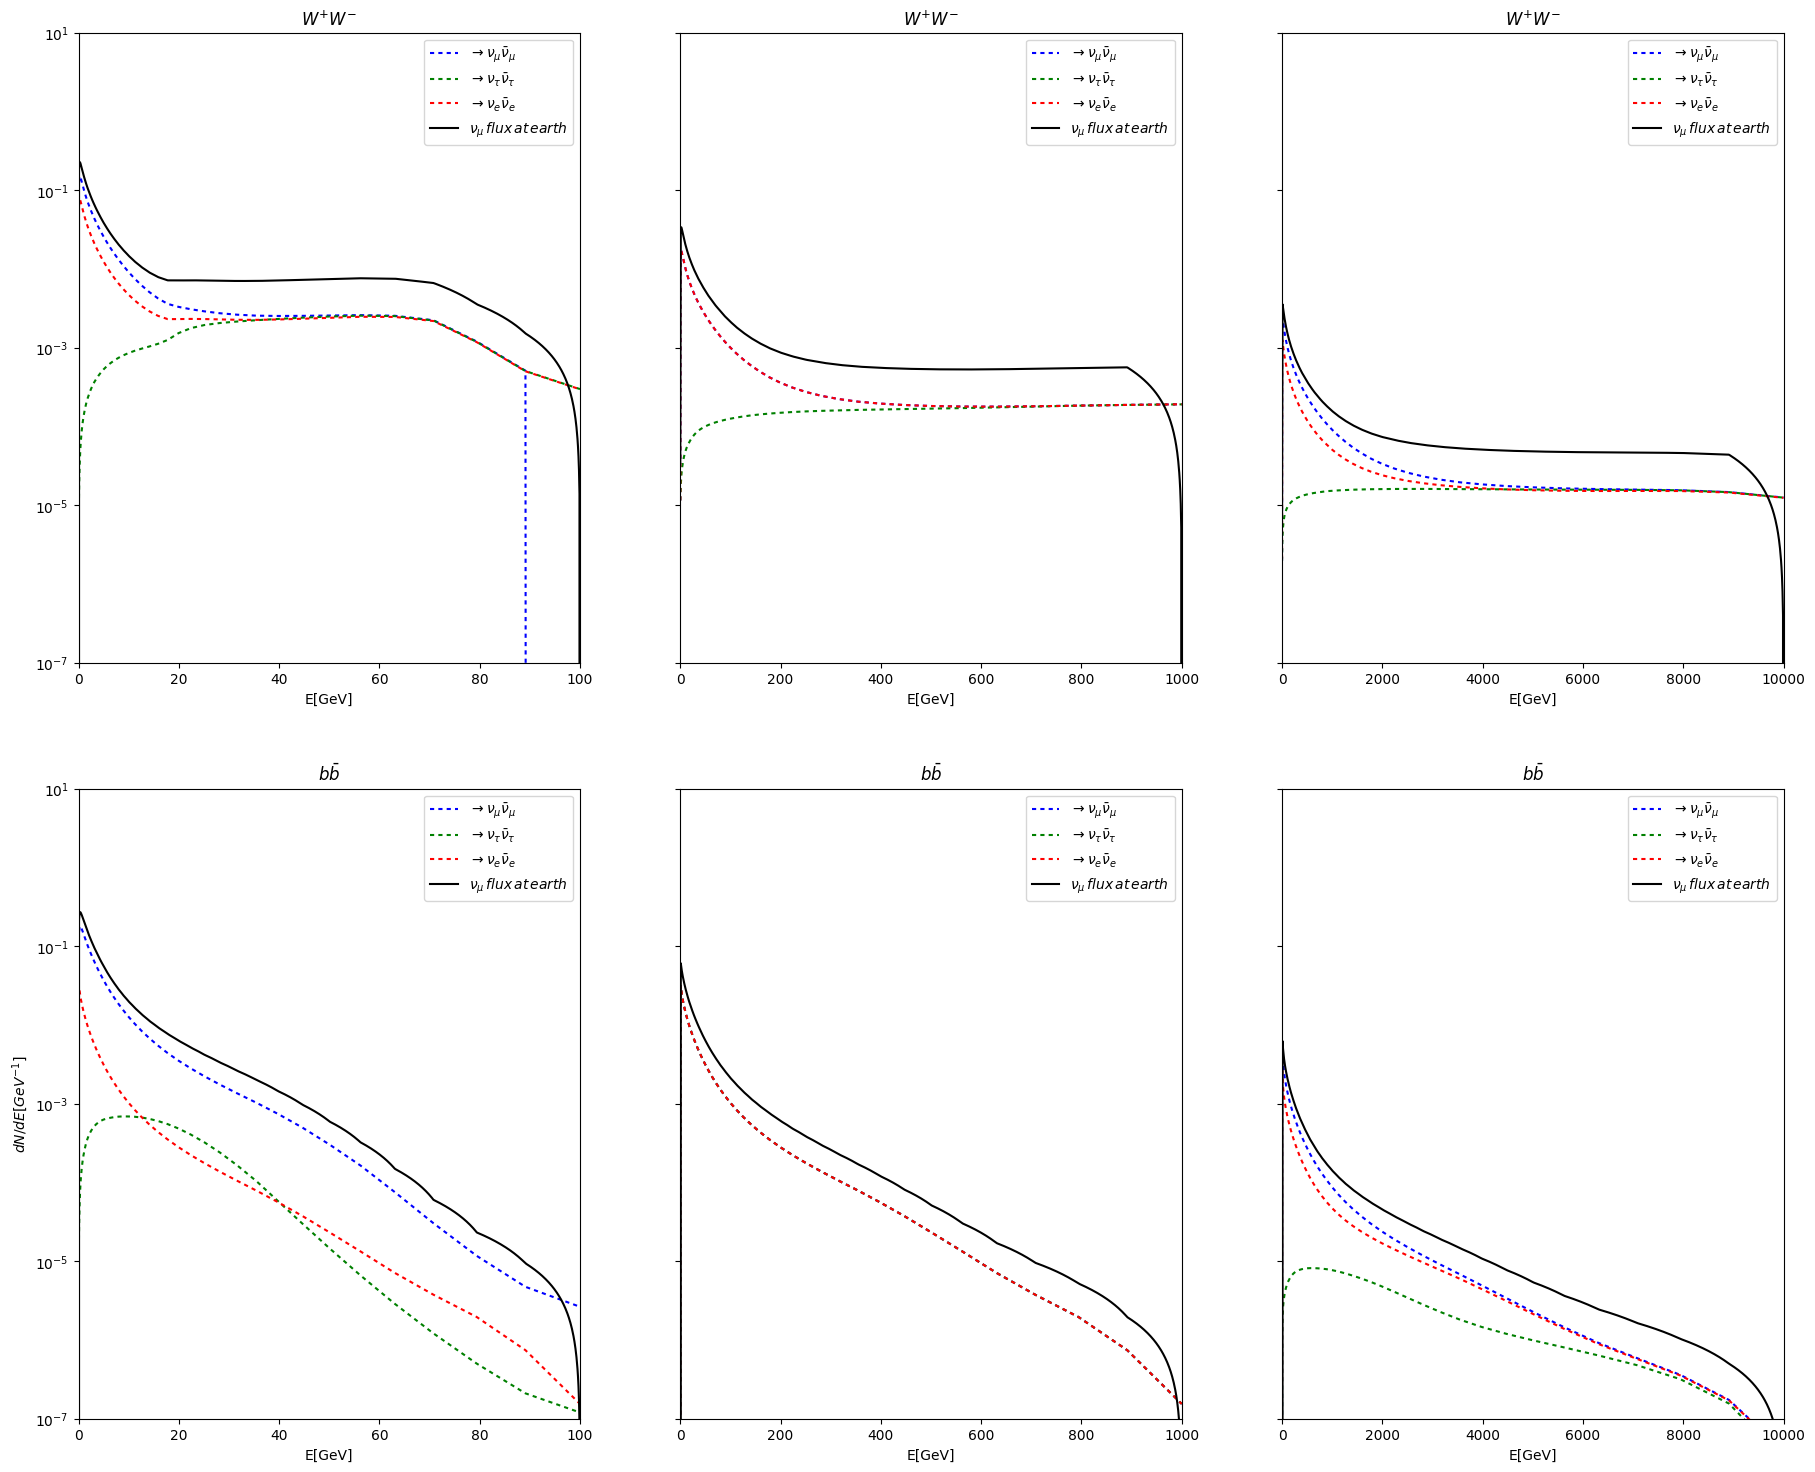

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(22, 18), sharex=False,sharey=True)
bins_100=np.linspace(0,100,1000)
bins_1000=np.linspace(0,1000,1000)
bins_10000=np.linspace(0,10000,1000)

axs[0][0].plot(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['W'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[0][0].plot(df_Wb_tau_100GeV['E'],df_Wb_tau_100GeV['W'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[0][0].plot(df_Wb_e_100GeV['E'],df_Wb_e_100GeV['W'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[0][0].plot(bins_100,f_100_W(bins_100),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[0][0].set_xlim((0,100))
axs[0][0].set_title(r'$W^{+}W^{-}$')

axs[1][0].plot(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['b'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[1][0].plot(df_Wb_tau_100GeV['E'],df_Wb_tau_100GeV['b'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[1][0].plot(df_Wb_e_100GeV['E'],df_Wb_e_1TeV['b'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[1][0].plot(bins_100,f_100_b(bins_100),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[1][0].set_xlim((0,100))
axs[1][0].set_ylabel(r'$dN/dE[GeV^{-1}]$')
axs[1][0].set_title(r'$b\bar{b}$')


axs[0][1].plot(df_Wb_mu_1TeV['E'],df_Wb_mu_1TeV['W'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[0][1].plot(df_Wb_tau_1TeV['E'],df_Wb_tau_1TeV['W'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[0][1].plot(df_Wb_e_1TeV['E'],df_Wb_e_1TeV['W'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[0][1].plot(bins_1000,f_1000_W(bins_1000),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[0][1].set_xlim((0,1000))
axs[0][1].set_title(r'$W^{+}W^{-}$')

axs[1][1].plot(df_Wb_mu_1TeV['E'],df_Wb_mu_1TeV['b'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[1][1].plot(df_Wb_e_1TeV['E'],df_Wb_e_1TeV['b'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[1][1].plot(df_Wb_e_1TeV['E'],df_Wb_e_1TeV['b'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[1][1].plot(bins_1000,f_1000_b(bins_1000),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[1][1].set_xlim((0,1000))
axs[1][1].set_title(r'$b\bar{b}$')

axs[0][2].plot(df_Wb_mu_10TeV['E'],df_Wb_mu_10TeV['W'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[0][2].plot(df_Wb_tau_10TeV['E'],df_Wb_tau_10TeV['W'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[0][2].plot(df_Wb_e_10TeV['E'],df_Wb_e_10TeV['W'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[0][2].plot(bins_10000,f_10000_W(bins_10000),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[0][2].set_xlim((0,10000))
axs[0][2].set_title(r'$W^{+}W^{-}$')


axs[1][2].plot(df_Wb_mu_10TeV['E'],df_Wb_mu_10TeV['b'],label=r'$\rightarrow \nu_{\mu}\bar{\nu}_{\mu}$',color='blue',dashes=[2, 2])
axs[1][2].plot(df_Wb_tau_10TeV['E'],df_Wb_tau_10TeV['b'],label=r'$\rightarrow \nu_{\tau}\bar{\nu}_{\tau}$',color='green',dashes=[2, 2])
axs[1][2].plot(df_Wb_e_10TeV['E'],df_Wb_e_10TeV['b'],label=r'$\rightarrow \nu_{e}\bar{\nu}_{e}$',color='red',dashes=[2, 2])
axs[1][2].plot(bins_10000,f_10000_b(bins_10000),label=r'$\nu_{\mu}\,flux\,at\,earth$',color='black')
axs[1][2].set_xlim((0,10000))
axs[1][2].set_title(r'$b\bar{b}$')




for i in range(0,len(axs)):
    for j in range(0,len(axs[i])):
        axs[i][j].set_xlabel('E[GeV]')
        axs[i][j].set_yscale('log')
        axs[i][j].set_ylim([1e-7,10])
        axs[i][j].legend()

In [41]:
#check normalisation 
print(np.sum(np.diff(bins_100)*f_100_W(bins_100)[:-1]))
print(np.sum(np.diff(bins_1000)*f_1000_W(bins_1000)[:-1]))
print(np.sum(np.diff(bins_10000)*f_10000_W(bins_10000)[:-1]))

print(np.sum(np.diff(bins_100)*f_100_b(bins_100)[:-1]))
print(np.sum(np.diff(bins_1000)*f_1000_b(bins_1000)[:-1]))
print(np.sum(np.diff(bins_10000)*f_10000_b(bins_10000)[:-1]))

1.1525704835445214
1.398320140559276
1.122428918696067
1.0396775369577778
1.329146157360308
0.9900240402624716


In [23]:
f_100_b(bins_100)

array([0.00000000e+00, 7.08436196e-02, 8.73529961e-02, 9.05732268e-02,
       8.97206651e-02, 8.73984539e-02, 8.44332005e-02, 8.11769528e-02,
       7.78845896e-02, 7.46513933e-02, 7.15162212e-02, 6.85346738e-02,
       6.56686887e-02, 6.29276989e-02, 6.03153926e-02, 5.79123336e-02,
       5.55756073e-02, 5.34392203e-02, 5.13585895e-02, 4.94594749e-02,
       4.75756284e-02, 4.59032806e-02, 4.42309329e-02, 4.26716730e-02,
       4.11773670e-02, 3.96830611e-02, 3.83691434e-02, 3.70738855e-02,
       3.57786277e-02, 3.46390274e-02, 3.35281205e-02, 3.24172135e-02,
       3.13750076e-02, 3.04321371e-02, 2.94892665e-02, 2.85463960e-02,
       2.76874848e-02, 2.68961265e-02, 2.61047681e-02, 2.53134098e-02,
       2.45530675e-02, 2.38970950e-02, 2.32411225e-02, 2.25851499e-02,
       2.19291774e-02, 2.13152649e-02, 2.07710622e-02, 2.02268595e-02,
       1.96826569e-02, 1.91384542e-02, 1.85942515e-02, 1.81471432e-02,
       1.77071868e-02, 1.72672303e-02, 1.68272738e-02, 1.63873174e-02,
      

### spline ###

Calculating spline basis...
Reticulating splines...
	Convolving bases...
		Convolving dimension 0
	Flattening residuals matrix...
Transforming fit array...
Computing least square solution...
Analyze[998]: 0.010000 s
Factorize[998]: 0.000000 s
Solve[998]: 0.000000 s
Done: cleaning up
Calculating spline basis...
Reticulating splines...
	Convolving bases...
		Convolving dimension 0
	Flattening residuals matrix...
Transforming fit array...
Computing least square solution...
Analyze[998]: 0.000000 s
Factorize[998]: 0.000000 s
Solve[998]: 0.000000 s
Done: cleaning up
Calculating spline basis...
Reticulating splines...
	Convolving bases...
		Convolving dimension 0
	Flattening residuals matrix...
Transforming fit array...
Computing least square solution...
Analyze[998]: 0.000000 s
Factorize[998]: 0.000000 s
Solve[998]: 0.000000 s
Done: cleaning up
Calculating spline basis...
Reticulating splines...
	Convolving bases...
		Convolving dimension 0
	Flattening residuals matrix...
Transforming fit a

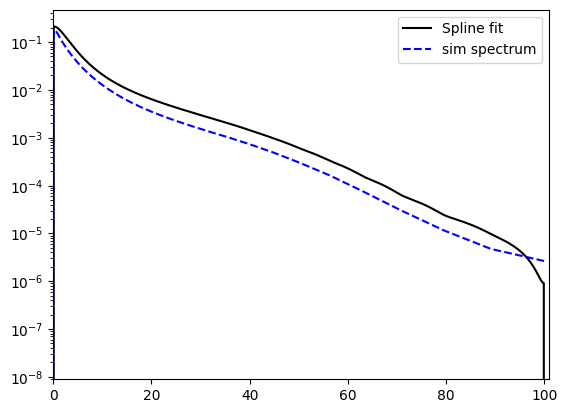

In [42]:
m=100
channel='bb'

w = np.repeat(1,np.shape(f_100_b(bins_100)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_100_b(bins_100) , w)
spline_bb_100 = glam_fit(zs,w,[bins_100],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_bb_100.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['b'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_bb_100.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))

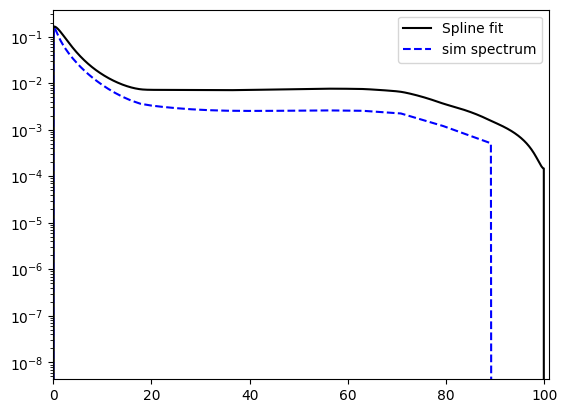

In [43]:
m=100
channel='WW'

w = np.repeat(1,np.shape(f_100_W(bins_100)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_100_W(bins_100) , w)
spline_WW_100 = glam_fit(zs,w,[bins_100],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_WW_100.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_100GeV['E'],df_Wb_mu_100GeV['W'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_WW_100.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))

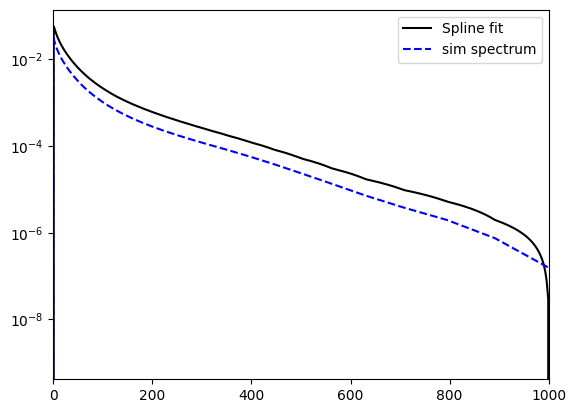

In [44]:
m=1000
channel='bb'

w = np.repeat(1,np.shape(f_1000_b(bins_1000)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_1000_b(bins_1000) , w)
spline_bb_1000 = glam_fit(zs,w,[bins_1000],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_bb_1000.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_1TeV['E'],df_Wb_mu_1TeV['b'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_bb_1000.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))

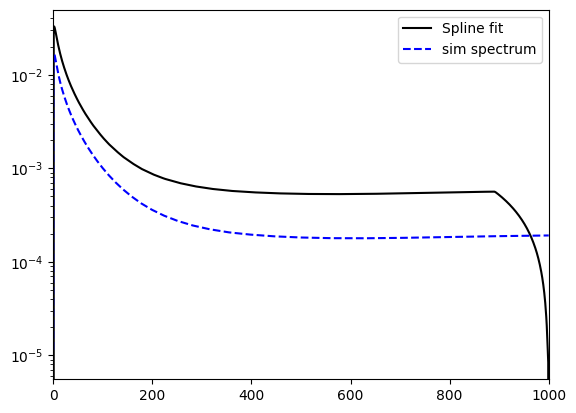

In [45]:
m=1000
channel='WW'

w = np.repeat(1,np.shape(f_1000_W(bins_1000)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_1000_W(bins_1000) , w)
spline_WW_1000 = glam_fit(zs,w,[bins_1000],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_WW_1000.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_1TeV['E'],df_Wb_mu_1TeV['W'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_WW_1000.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))

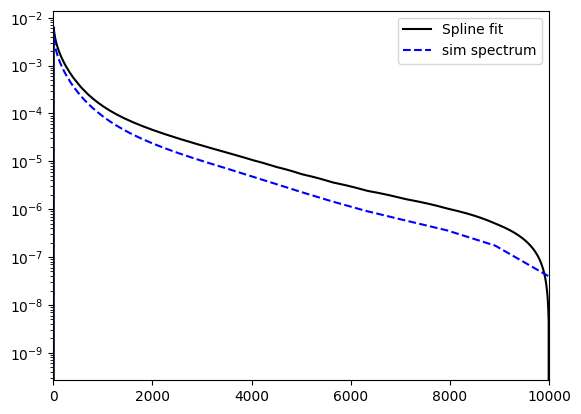

In [46]:
m=10000
channel='bb'

w = np.repeat(1,np.shape(f_10000_b(bins_10000)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_10000_b(bins_10000) , w)
spline_bb_10000 = glam_fit(zs,w,[bins_10000],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_bb_10000.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_10TeV['E'],df_Wb_mu_10TeV['b'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_bb_10000.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))

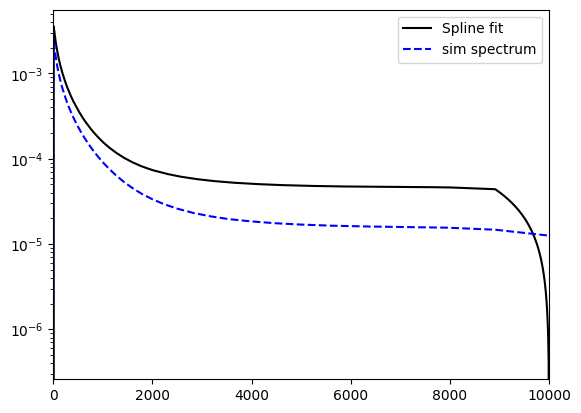

In [47]:
m=10000
channel='WW'

w = np.repeat(1,np.shape(f_10000_W(bins_10000)))
order = 1
penalty_order = order
knots = [np.linspace(0,m,1000)]
smooth = 1

zs, w = ndsparse.from_data(f_10000_W(bins_10000) , w)
spline_WW_10000 = glam_fit(zs,w,[bins_10000],knots,[order],[smooth],[penalty_order])

xfine=np.linspace(0,m,1000)
plt.plot(xfine, spline_WW_10000.grideval([xfine]), label='Spline fit', color='k')
plt.plot(df_Wb_mu_10TeV['E'],df_Wb_mu_10TeV['W'],'--b',label='sim spectrum')
plt.yscale('log')
plt.xlim([0,m+1])
plt.legend()

spline_WW_10000.write('splinefit_{}_earth_{}_ann.fits'.format(channel,str(m)))